This notebook demonstrates the use of [PolarCAP](https://doi.org/10.1016/j.aiig.2022.08.001) for first motion polarity classification of earthquake waveforms.

In [1]:
import sys
sys.path.insert(0, '..')

## (1) Testing on STEAD Dataset

### $(\mathrm{i})$ Loading the data
For more information on using this dataset refer to example 01.

In [2]:
from saipy.data.base import STEAD
stead = STEAD('/home/seismoai/data')
print(stead)

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,trace_name
0,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-21 05:55:00,noise,109C.TA_201510210555_NO
1,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06 14:50:00,noise,109C.TA_201511061450_NO
2,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-07 02:20:00,noise,109C.TA_201511070220_NO
3,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-14 05:15:00,noise,109C.TA_201511140515_NO
4,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-25 18:50:00,noise,109C.TA_201512251850_NO


Dataset containing 1265657 seismological waveforms.
Metadata: Available
Waveform data: Available


### $(\mathrm{ii})$ Getting Data and Labels in the format for PolarCAP

In [3]:
X = stead.get_polarcap_data(stead.trace_list()[-20:])

100%|██████████| 20/20 [00:01<00:00, 10.90it/s]


In [4]:
X.shape

(20, 64)

In [5]:
from saipy.utils.visualizations import plot_polarcap_data

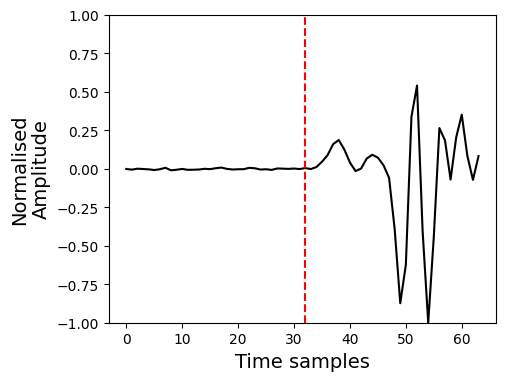

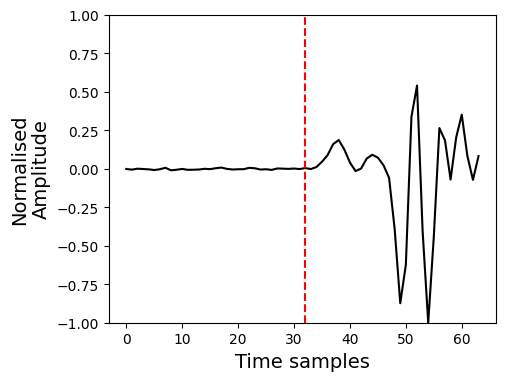

In [6]:
plot_polarcap_data(X[6])

### $(\mathrm{iii})$ Loading PolarCAP

In [7]:
import sys
sys.path.insert(0, '..')
from saipy.models.polarcap import PolarCAP
polarcap = PolarCAP()
print(polarcap)

2023-08-17 15:12:45.520903: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "model_20"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_23 (InputLayer)          [(None, 64, 1)]      0           []                               
                                                                                                  
 conv1d_104 (Conv1D)            (None, 64, 32)       1056        ['input_23[0][0]']               
                                                                                                  
 dropout_22 (Dropout)           (None, 64, 32)       0           ['conv1d_104[0][0]']             
                                                                                                  
 batch_normalization_84 (BatchN  (None, 64, 32)      128         ['dropout_22[0][0]']             
 ormalization)                                                                             

In [8]:
predictions = polarcap.predict(X)

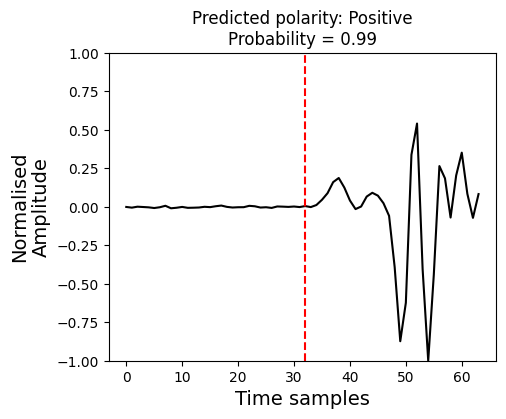

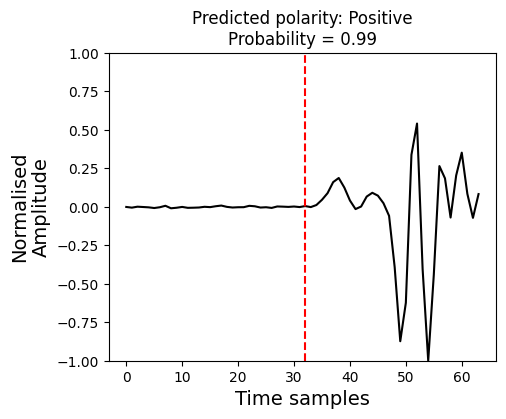

In [9]:
plot_polarcap_data(X[6], y_pred = predictions[6])

In [10]:
predictions

[('Positive', 0.999995),
 ('Positive', 0.99998987),
 ('Positive', 0.98861665),
 ('Positive', 0.9991629),
 ('Positive', 0.99995756),
 ('Positive', 0.9994506),
 ('Positive', 0.9880166),
 ('Negative', 0.9534959),
 ('Positive', 0.99986684),
 ('Negative', 0.99048024),
 ('Positive', 0.9995993),
 ('Positive', 0.999851),
 ('Positive', 0.9994962),
 ('Negative', 0.9998591),
 ('Negative', 0.9997756),
 ('Negative', 0.9999994),
 ('Positive', 0.99996495),
 ('Positive', 0.9998559),
 ('Negative', 0.82403696),
 ('Negative', 0.9999751)]

## (2) Testing on INSTANCE Dataset

### $(\mathrm{i})$ Loading the data
For more information on using this dataset refer to example 01.

In [11]:
import sys
sys.path.insert(0, '..')
from saipy.data.base import INSTANCE
instance = INSTANCE('/home/seismoai/data')
print(instance)

,source_id,station_network_code,station_code,station_location_code,station_channels,station_latitude_deg,station_longitude_deg,station_elevation_m,station_vs_30_mps,station_vs_30_detail,...,trace_Z_upper_quartile_counts,trace_E_spikes,trace_N_spikes,trace_Z_spikes,trace_name,trace_GPD_P_number,trace_GPD_S_number,trace_EQT_number_detections,trace_EQT_P_number,trace_EQT_S_number
0,20050103T055721,MN,CUC,NaN,HH,39.9938,15.8155,637.0,807.0,Vs30 extracted from ShakeMap,...,60.0,0.0,0.0,0.0,20050103T055721.MN.CUC..HH,0,1,0.0,0.0,0.0
1,20050107T055514,MN,CUC,NaN,HH,39.9938,15.8155,637.0,807.0,Vs30 extracted from ShakeMap,...,70.0,0.0,0.0,0.0,20050107T055514.MN.CUC..HH,0,0,0.0,0.0,0.0
2,20050110T014724,MN,CUC,NaN,HH,39.9938,15.8155,637.0,807.0,Vs30 extracted from ShakeMap,...,35.0,0.0,0.0,0.0,20050110T014724.MN.CUC..HH,0,0,0.0,0.0,0.0
3,20050115T171350,MN,CUC,NaN,HH,39.9938,15.8155,637.0,807.0,Vs30 extracted from ShakeMap,...,71.0,0.0,0.0,0.0,20050115T171350.MN.CUC..HH,0,2,0.0,0.0,0.0
4,20050116T210022,MN,CUC,NaN,HH,39.9938,15.8155,637.0,807.0,Vs30 extracted from ShakeMap,...,190.0,0.0,0.0,0.0,20050116T210022.MN.CUC..HH,0,1,0.0,0.0,0.0


,source_id,station_network_code,station_code,station_location_code,station_channels,station_latitude_deg,station_longitude_deg,station_elevation_m,station_vs_30_mps,station_vs_30_detail,...,trace_sa03_cmps2,trace_sa10_cmps2,trace_sa30_cmps2,trace_name,trace_GPD_P_number,trace_GPD_S_number,trace_EQT_number_detections,trace_EQT_P_number,trace_EQT_S_number,trace_deconvolved_units
0,10000541,MN,AQU,NaN,HH,42.35400,13.40500,710.0,485.0,Vs30 extracted from ShakeMap,...,0.000812,0.000071,0.000019,10000541.MN.AQU..HH,1.0,1.0,1.0,1.0,1.0,mps
1,10000541,MN,AQU,NaN,HL,42.35400,13.40500,710.0,485.0,Vs30 extracted from ShakeMap,...,0.000836,0.000135,0.000050,10000541.MN.AQU..HL,NaN,NaN,NaN,NaN,NaN,mps2
2,10000541,IV,ARRO,NaN,EH,42.57917,12.76567,253.0,549.0,Vs30 extracted from ShakeMap,...,0.000871,0.000046,0.000022,10000541.IV.ARRO..EH,2.0,1.0,1.0,1.0,1.0,mps
3,10000541,IV,ASSB,NaN,HH,43.04260,12.65870,734.0,412.0,Vs30 extracted from ShakeMap,...,0.001400,0.000068,0.000015,10000541.IV.ASSB..HH,1.0,7.0,1.0,1.0,1.0,mps
4,10000541,IV,ATCC,NaN,EH,43.18514,12.63994,557.0,667.0,Vs30 extracted from ShakeMap,...,0.001339,0.000057,0.000028,10000541.IV.ATCC..EH,1.0,3.0,1.0,1.0,1.0,mps


INSTANCE Dataset


### $(\mathrm{ii})$ Getting Data and Labels in the format for PolarCAP

In [12]:
X, y = instance.get_polarcap_data(instance.trace_list_events()[-20:])

100%|██████████| 20/20 [00:15<00:00,  1.29it/s]


In [13]:
X.shape, y.shape

((20, 64), (20, 1))

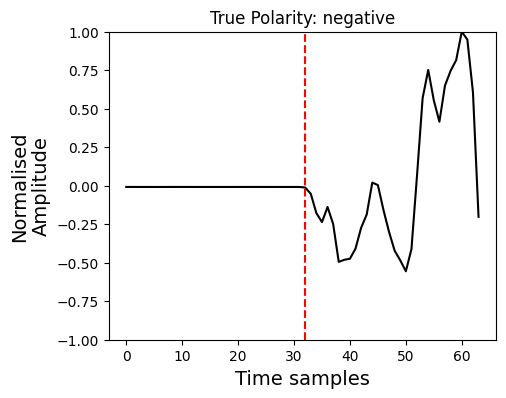

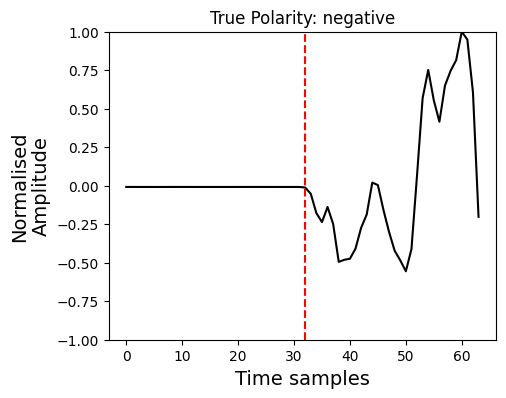

In [14]:
plot_polarcap_data(X[13], y[13])

### $(\mathrm{iii})$ Testing PolarCAP

In [15]:
predictions = polarcap.predict(X)

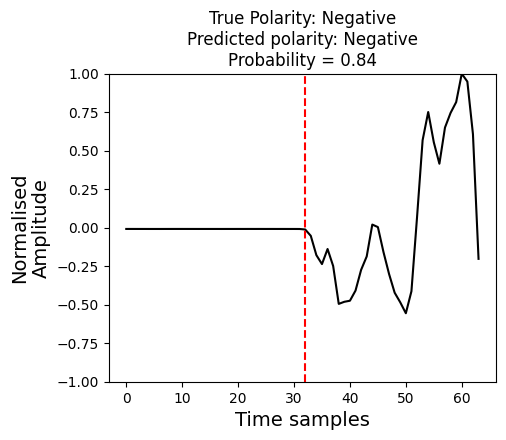

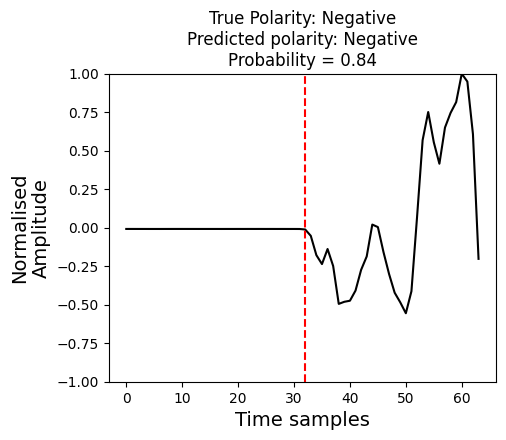

In [16]:
plot_polarcap_data(X[13], y[13], predictions[13])

## (3) Retraining

In [17]:
model = polarcap.get_model(untrained = True)

In [ ]:
X, y = instance.get_polarcap_data(instance.trace_list_events()[-2000:], training = True)

 44%|████▍     | 880/2000 [11:46<13:07,  1.42it/s]

In [ ]:
model.fit(X,[X,y], epochs = 10)

In [ ]:
y.shape